<a href="https://colab.research.google.com/github/Sokolik-data/ML/blob/main/cost_hous.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#from google.colab import files

In [2]:
#files.upload()

In [ ]:
import pandas as pd
data = pd.read_csv('housing_dataset.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

In [ ]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [ ]:
data = data.drop(columns=["date", "street", "country"])

In [ ]:
data = pd.get_dummies(data, columns=["city", "statezip"], drop_first=True)


In [ ]:
X = data.drop(columns=["price"])
y = data["price"]


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
import numpy as np

def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000, tolerance=1e-6):
    m, n = X.shape
    theta = np.zeros(n)
    y = y.values
    cost_history = []

    for i in range(n_iterations):
        y_pred = X @ theta
        error = y_pred - y
        gradients = (2 / m) * X.T @ error
        theta_new = theta - learning_rate * gradients

        if np.all(np.abs(theta_new - theta) < tolerance):
            print(f"Сошлось на итерации {i}")
            break

        theta = theta_new
        cost = (1 / m) * np.sum(error**2)
        cost_history.append(cost)

    return theta, cost_history

In [ ]:
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [ ]:
theta, cost_history = gradient_descent(X_train_b, y_train, learning_rate=0.01, n_iterations=1000)

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = X_test_b @ theta
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Средняя абсолютная ошибка (MAE): {mae}")
print(f"Коэффициент детерминации (R²): {r2}")

Средняя абсолютная ошибка (MAE): 123528.20888476721
Коэффициент детерминации (R²): 0.585915690326105


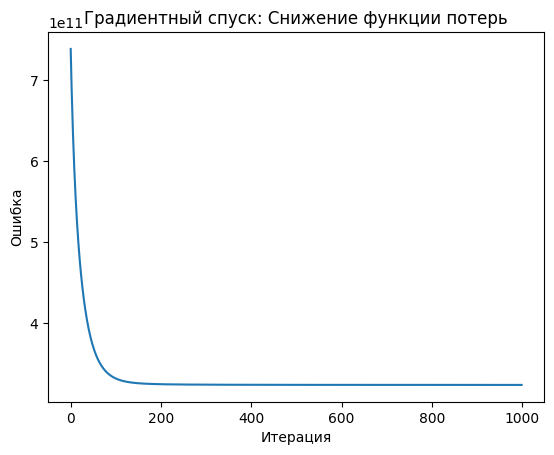

In [ ]:
import matplotlib.pyplot as plt

plt.plot(cost_history)
plt.title("Градиентный спуск: Снижение функции потерь")
plt.xlabel("Итерация")
plt.ylabel("Ошибка")
plt.show()

In [ ]:
import statistics
mean_price = statistics.mean(data['price'])
print(f"Средняя цена: {mean_price}")

Средняя цена: 553062.8772890785


In [ ]:
build_den = data['sqft_living'] / data['sqft_lot']
print(f"Средняя плотность зданий: {build_den}")

Средняя плотность зданий: 0       0.968208
1       0.022204
2       0.055916
3       1.103982
4       0.436208
          ...   
4135    0.237421
4136    0.192790
4137    0.429142
4138    0.315234
4139    0.183905
Length: 4140, dtype: float64


In [ ]:
data['build_den'] = build_den

In [ ]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354,build_den
0,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,...,False,False,False,False,False,False,False,False,False,0.968208
1,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,...,False,False,False,False,False,False,False,False,False,0.022204
2,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,...,False,False,False,False,False,False,False,False,False,0.055916
3,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,...,False,False,False,False,False,False,False,False,False,1.103982
4,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,...,False,False,False,False,False,False,False,False,False,0.436208


In [ ]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354,build_den
price,1.000000,0.188765,0.317785,0.418528,0.045964,0.143180,0.131401,0.217553,0.030327,0.355214,...,-0.023315,-0.064128,0.030255,-0.051842,-0.037278,-0.046368,0.085411,-0.010192,-0.010098,0.070989
bedrooms,0.188765,1.000000,0.542549,0.590110,0.065747,0.178908,-0.001286,0.105512,0.016503,0.478124,...,-0.005874,-0.068520,0.018228,-0.005211,-0.004355,-0.017989,0.001265,-0.009741,-0.009741,0.012956
bathrooms,0.317785,0.542549,1.000000,0.760353,0.097497,0.487462,0.080152,0.210590,-0.123024,0.687679,...,-0.054604,-0.122731,0.005724,-0.038112,-0.031063,-0.033672,0.021856,-0.011573,-0.011573,0.271620
sqft_living,0.418528,0.590110,0.760353,1.000000,0.194226,0.345130,0.126157,0.308098,-0.069315,0.874881,...,-0.017422,-0.094265,0.040504,-0.037968,-0.020932,-0.030338,0.008613,-0.013747,-0.020406,0.060077
sqft_lot,0.045964,0.065747,0.097497,0.194226,1.000000,-0.001113,0.019229,0.071264,0.012016,0.203190,...,0.000192,-0.013937,-0.004178,-0.017568,-0.006678,-0.011834,-0.032720,0.022593,-0.002787,-0.282188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
statezip_WA 98198,-0.046368,-0.017989,-0.033672,-0.030338,-0.011834,-0.043891,0.041102,0.070422,0.006219,-0.033121,...,-0.012472,-0.013994,-0.012222,-0.011707,-0.008347,1.000000,-0.013657,-0.002455,-0.002455,-0.046415
statezip_WA 98199,0.085411,0.001265,0.021856,0.008613,-0.032720,0.009888,-0.010622,0.065824,0.027784,-0.025807,...,-0.013657,-0.015324,-0.013384,-0.012819,-0.009140,-0.013657,1.000000,-0.002688,-0.002688,0.095592
statezip_WA 98288,-0.010192,-0.009741,-0.011573,-0.013747,0.022593,-0.000581,-0.001910,-0.006859,0.001542,-0.007309,...,-0.002455,-0.002755,-0.002406,-0.002305,-0.001643,-0.002455,-0.002688,1.000000,-0.000483,-0.025064
statezip_WA 98354,-0.010098,-0.009741,-0.011573,-0.020406,-0.002787,-0.021132,-0.001910,-0.006859,0.017744,-0.014712,...,-0.002455,-0.002755,-0.002406,-0.002305,-0.001643,-0.002455,-0.002688,-0.000483,1.000000,-0.016958


In [ ]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,build_den
count,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,0.007488,0.246618,3.452415,1831.351449,312.287440,1970.814010,808.368357,0.328003
std,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.086219,0.790619,0.678533,861.382947,464.349222,29.807941,979.380535,0.264507
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,0.002123
25%,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,0.159091
50%,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000,0.254688
75%,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000,0.417008
max,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,4820.000000,2014.000000,2014.000000,2.291399


In [ ]:
X = data.drop(columns=["price"])
y = data["price"]

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000, tolerance=1e-6):
    m, n = X.shape
    theta = np.zeros(n)
    y = y.values
    cost_history = []

    for i in range(n_iterations):
        y_pred = X @ theta
        error = y_pred - y
        gradients = (2 / m) * X.T @ error
        theta_new = theta - learning_rate * gradients

        if np.all(np.abs(theta_new - theta) < tolerance):
            print(f"Сошлось на итерации {i}")
            break

        theta = theta_new
        cost = (1 / m) * np.sum(error**2)
        cost_history.append(cost)

    return theta, cost_history

In [ ]:
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [ ]:
theta, cost_history = gradient_descent(X_train_b, y_train, learning_rate=0.01, n_iterations=1000)

In [ ]:
y_pred = X_test_b @ theta
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Средняя абсолютная ошибка (MAE): {mae}")
print(f"Коэффициент детерминации (R²): {r2}")

Средняя абсолютная ошибка (MAE): 123947.71898972266
Коэффициент детерминации (R²): 0.5850440282302816
